<span style="font-size: 32pt; font-weight: bold; color:orchid">Student Study Performance</span>

In [119]:
import pandas as pd
dataset = pd.read_csv(r"C:\Users\HP\Downloads\study_performance.csv")
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,NaN,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,NaN
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   999 non-null    float64
 6   reading_score                999 non-null    float64
 7   writing_score                998 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


<span style="font-size: 15pt; color:grey">math_score , reading_score ve writing_score 1000 satir değil , null değer var olması gerekir</span>

In [121]:
dataset.isnull().values.any()

True

<span style="font-size: 13pt; color:grey">Null değerler temizlememiz gerekir. Mean ile dolduracağiz.</span>

<span style="font-size: 32pt; font-weight: bold; color:plum">Veri Temizleme</span>

In [122]:
mean_math_score = dataset['math_score'].mean()
print(f"Mean math score: {mean_math_score:.2f}")

mean_reading_score = dataset['reading_score'].mean()
print(f"Mean reading score: {mean_reading_score:.2f}")

mean_writing_score = dataset['writing_score'].mean()
print(f"Mean writing score: {mean_writing_score:.2f}")

Mean math score: 66.07
Mean reading score: 69.18
Mean writing score: 68.01


In [123]:
dataset['math_score'].fillna(mean_math_score, inplace=True)
dataset['reading_score'].fillna(mean_reading_score, inplace=True)
dataset['writing_score'].fillna(mean_writing_score, inplace=True)

dataset.isnull().values.any()

False

In [124]:
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.000000,72.0,74.000000
1,female,group C,some college,standard,completed,69.000000,90.0,88.000000
2,female,group B,master's degree,standard,none,66.065065,95.0,93.000000
3,male,group A,associate's degree,free/reduced,none,47.000000,57.0,44.000000
4,male,group C,some college,standard,none,76.000000,78.0,75.000000
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.0,68.012024
996,male,group C,high school,free/reduced,none,62.000000,55.0,55.000000
997,female,group C,high school,free/reduced,completed,59.000000,71.0,65.000000
998,female,group D,some college,standard,completed,68.000000,78.0,77.000000


<span style="font-size: 30pt; font-weight: bold; color:plum">Veri Dönüşüm</span>

In [125]:
dataset['lunch'] = dataset['lunch'].replace('standard', 'ate').replace('free/reduced', "Didn't eat")
display(dataset)
#[ ['lunch' , 'math_score' , 'reading_score' , 'writing_score'] ]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,ate,none,72.000000,72.0,74.000000
1,female,group C,some college,ate,completed,69.000000,90.0,88.000000
2,female,group B,master's degree,ate,none,66.065065,95.0,93.000000
3,male,group A,associate's degree,Didn't eat,none,47.000000,57.0,44.000000
4,male,group C,some college,ate,none,76.000000,78.0,75.000000
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,ate,completed,88.000000,99.0,68.012024
996,male,group C,high school,Didn't eat,none,62.000000,55.0,55.000000
997,female,group C,high school,Didn't eat,completed,59.000000,71.0,65.000000
998,female,group D,some college,ate,completed,68.000000,78.0,77.000000


<span style="font-size: 13pt; color:grey">Bizim amacımız öğrencilerin notlarını etkileyen faktörleri belirlemektir.</span>

<span style="font-size: 32pt; font-weight: bold; color:plum">Veri Analiz</span>

In [126]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.065065,69.183183,68.012024
std,15.144178,14.602216,15.164294
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [127]:
dataset[dataset['math_score'] == 0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,Didn't eat,none,0.0,17.0,10.0


In [128]:
dataset[(dataset['math_score'] == 100) & (dataset['reading_score'] == 100) & (dataset['writing_score'] == 100)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
458,female,group E,bachelor's degree,ate,none,100.0,100.0,100.0
916,male,group E,bachelor's degree,ate,completed,100.0,100.0,100.0
962,female,group E,associate's degree,ate,none,100.0,100.0,100.0


<span style="font-size: 22pt; font-weight: bold;">Irk faktörü</span>

In [129]:
# Group by 'race_ethnicity' and compute mean, max and min for each subjects
Stats_by_ethnicity = dataset.groupby('race_ethnicity')[['math_score', 'writing_score', 'reading_score']].agg(['mean', 'min', 'max'])

# Display the results
print("Scores Statistics by Ethnicity:")
display(Stats_by_ethnicity)

Scores Statistics by Ethnicity:


math_score              writing_score               \
                     mean   min    max          mean   min    max   
race_ethnicity                                                      
group A         61.629213  28.0  100.0     62.674157  19.0   97.0   
group B         63.326658   8.0   97.0     65.600000  15.0   96.0   
group C         64.463950   0.0   98.0     67.827586  10.0  100.0   
group D         67.362595  26.0  100.0     70.087832  32.0  100.0   
group E         73.821429  30.0  100.0     71.214372  22.0  100.0   

               reading_score               
                        mean   min    max  
race_ethnicity                             
group A            64.674157  23.0  100.0  
group B            67.353596  24.0   97.0  
group C            69.115987  17.0  100.0  
group D            70.045802  31.0  100.0  
group E            73.071429  26.0  100.0

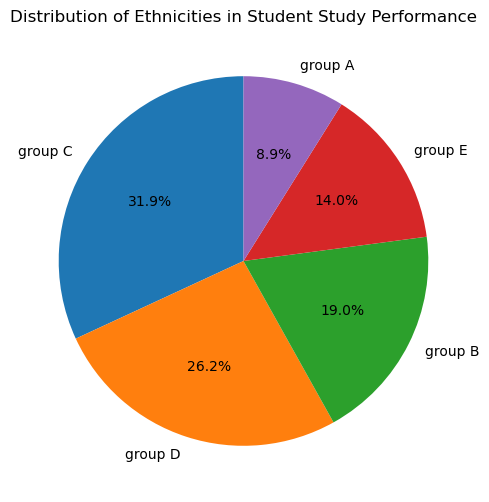

In [130]:
import matplotlib.pyplot as plt
ethnicity_counts = dataset['race_ethnicity'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Ethnicities in Student Study Performance")

# Show the plot
plt.show()

<span style="font-size: 22pt; font-weight: bold;">Ebeveynlerin eğitim düzeyi faktörü</span>

In [131]:
# Group by 'parental_level_of_education' and compute mean, max and min for each subjects
stats_by_parental_level_of_education = dataset.groupby('parental_level_of_education')[['math_score', 'writing_score', 'reading_score']].agg(['mean', 'min', 'max'])

# Display the results
print("Scores Statistics by parental level of education:")
display(stats_by_parental_level_of_education)

Scores Statistics by parental level of education:


math_score              writing_score        \
                                  mean   min    max          mean   min   
parental_level_of_education                                               
associate's degree           67.882883  26.0  100.0     69.828883  35.0   
bachelor's degree            69.389831  29.0  100.0     73.381356  38.0   
high school                  62.137755   8.0   99.0     62.448980  15.0   
master's degree              69.340086  40.0   95.0     75.220543  46.0   
some college                 67.128319  19.0  100.0     68.840708  19.0   
some high school             63.497207   0.0   97.0     64.888268  10.0   

                                   reading_score               
                               max          mean   min    max  
parental_level_of_education                                    
associate's degree           100.0     70.927928  31.0  100.0  
bachelor's degree            100.0     73.033898  41.0  100.0  
high school                  100.0     64.724490  24.0   99.0  
master's degree              100.0     75.474576  42.0  100.0  
some college                  99.0     69.460988  23.0  100.0  
some high school             100.0     66.938547  17.0  100.0

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


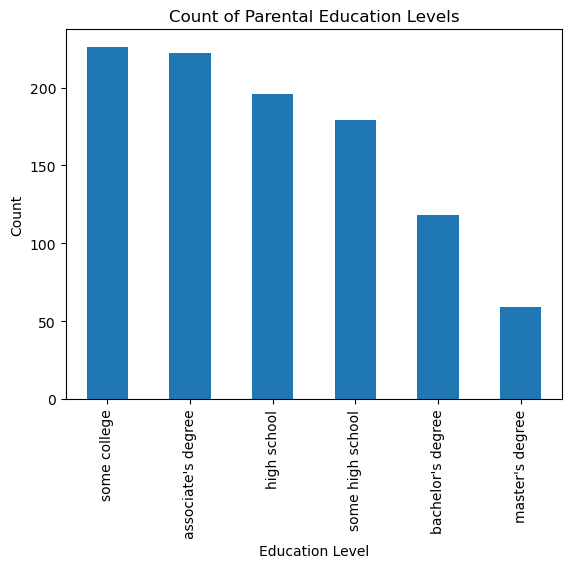

In [132]:
counts = dataset['parental_level_of_education'].value_counts()
print(counts)

counts.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Parental Education Levels')
plt.show()

<span style="font-size: 22pt; font-weight: bold;">Cinsiyet faktörü</span>

In [133]:
from IPython.display import Markdown, display

female_anakutle = dataset[dataset['gender'] == 'female']
male_anakutle = dataset[dataset['gender'] == 'male']

display(Markdown(f"<span style='font-size:20px;'>Female Students: \n</span>"))
display(female_anakutle)

display(Markdown(f"<span style='font-size:20px;'>Male Students: \n</span>"))
display(male_anakutle)

<span style='font-size:20px;'>Female Students: 
</span>

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,ate,none,72.000000,72.0,74.000000
1,female,group C,some college,ate,completed,69.000000,90.0,88.000000
2,female,group B,master's degree,ate,none,66.065065,95.0,93.000000
5,female,group B,associate's degree,ate,none,71.000000,83.0,78.000000
6,female,group B,some college,ate,completed,88.000000,95.0,92.000000
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,Didn't eat,none,62.000000,72.0,74.000000
995,female,group E,master's degree,ate,completed,88.000000,99.0,68.012024
997,female,group C,high school,Didn't eat,completed,59.000000,71.0,65.000000
998,female,group D,some college,ate,completed,68.000000,78.0,77.000000


<span style='font-size:20px;'>Male Students: 
</span>

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group A,associate's degree,Didn't eat,none,47.0,57.0,44.0
4,male,group C,some college,ate,none,76.0,78.0,75.0
7,male,group B,some college,Didn't eat,none,40.0,43.0,39.0
8,male,group D,high school,Didn't eat,completed,64.0,64.0,67.0
10,male,group C,associate's degree,ate,none,58.0,54.0,52.0
...,...,...,...,...,...,...,...,...
985,male,group A,high school,ate,none,57.0,51.0,54.0
987,male,group E,some high school,ate,completed,81.0,75.0,76.0
990,male,group E,high school,Didn't eat,completed,86.0,81.0,75.0
994,male,group A,high school,ate,none,63.0,63.0,62.0


<span style="font-size: 23pt; font-weight: bold; color:plum">Histogram Chart</span>

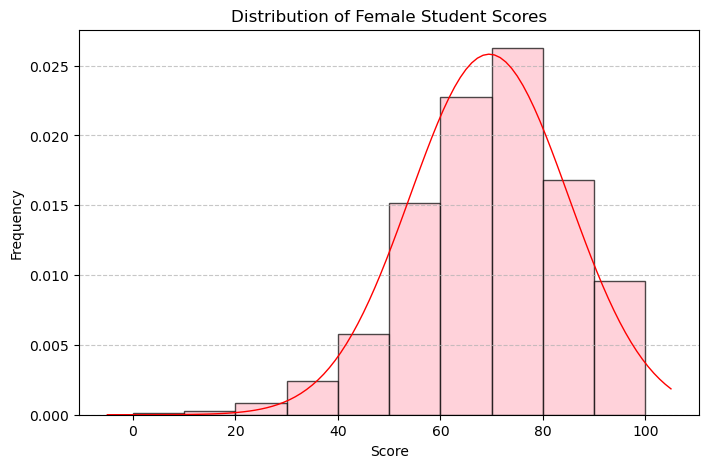

In [134]:
from scipy.stats import norm
import numpy as np

average_score_female_values = female_anakutle[['math_score', 'reading_score', 'writing_score']].values.flatten()

# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(average_score_female_values, bins=10, color='pink', edgecolor='black', alpha=0.7, density=True)

# Fit a normal distribution to the data
mu, std = norm.fit(average_score_female_values)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=1)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Female Student Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

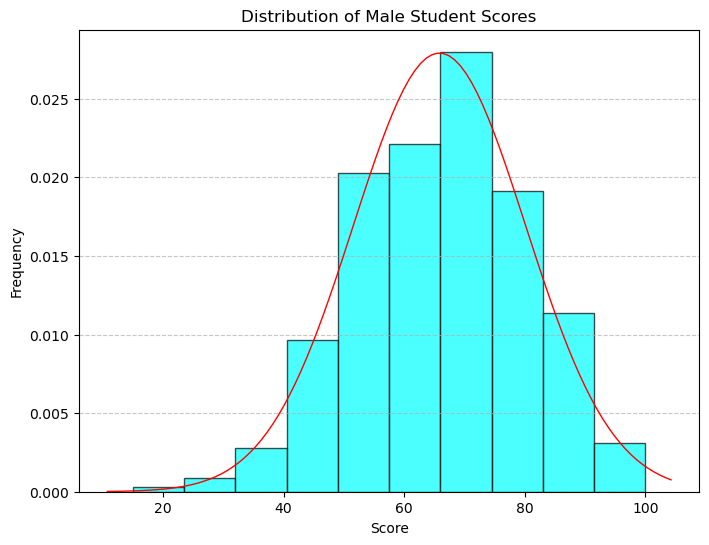

In [135]:
average_score_male_values = male_anakutle[['math_score', 'reading_score', 'writing_score']].values.flatten()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(average_score_male_values, bins=10, color='cyan', edgecolor='black', alpha=0.7, density=True)

# Fit a normal distribution to the data
mu, std = norm.fit(average_score_male_values)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=1)  # Change 'k' to 'r' for red color and linewidth to 1 for a thinner line

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Male Student Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style="font-size: 28pt; font-weight: bold; color:plum">İki Anakütle Ortalamasının Z testi</span>

<span style="font-size: 20pt; ">.   ilk olarak her anakütlenin varyansları buluruz</span>

In [136]:
from IPython.display import Markdown, display

male_df = dataset[dataset['gender'] == 'male']
math_variance = male_df['math_score'].var()
reading_variance = male_df['reading_score'].var()
writing_variance = male_df['writing_score'].var()
overall_variance_male = (math_variance + reading_variance + writing_variance) / 3
display(Markdown(f"<span style='font-size:15px;'>Male Ana Kutle Varyansi: {overall_variance_male:.2f}</span>"))

female_df = dataset[dataset['gender'] == 'female']
math_variance = female_df['math_score'].var()
reading_variance = female_df['reading_score'].var()
writing_variance = female_df['writing_score'].var()
overall_variance_female = (math_variance + reading_variance + writing_variance) / 3
display(Markdown(f"<span style='font-size:15px;'>Female Ana Kutle Varyansi: {overall_variance_female:.2f}</span>"))

<span style='font-size:15px;'>Male Ana Kutle Varyansi: 199.88</span>

<span style='font-size:15px;'>Female Ana Kutle Varyansi: 221.54</span>

<span style="font-size: 20pt; ">Sonra her anakütleden örneklem alıp onun ortalaması hesaplarız</span>

In [137]:
female_orneklem = dataset[dataset['gender'] == 'female'].head(50)
#display(female_orneklem)

N1 = len(female_orneklem)
display(Markdown(f"<span style='font-size:15px;'>Number of females’ samples: {N1}</span>"))

average_score_female_orneklem = female_orneklem[['math_score','reading_score','writing_score']].mean().mean()
display(Markdown(f"<span style='font-size:15px;'>Average scores for females’ sample (across all subjects): {average_score_female_orneklem:.2f}</span>"))





<span style='font-size:15px;'>Number of females’ samples: 50</span>

<span style='font-size:15px;'>Average scores for females’ sample (across all subjects): 66.22</span>

In [138]:
male_orneklem = dataset[dataset['gender'] == 'male'].head(50)
#display(male_orneklem)

N2 = len(male_orneklem)
display(Markdown(f"<span style='font-size:15px;'>Number of males’ samples: {N2}</span>"))

average_score_male_orneklem = male_orneklem[['math_score','reading_score','writing_score']].mean().mean()
display(Markdown(f"<span style='font-size:15px;'>Average scores for males’ sample (across all subjects): {average_score_male_orneklem:.2f}</span>"))

<span style='font-size:15px;'>Number of males’ samples: 50</span>

<span style='font-size:15px;'>Average scores for males’ sample (across all subjects): 59.21</span>

<span style="font-size: 20pt; ">Son olarak hipotezler kurup Z test uygulanırız</span>

In [139]:
# (H0):  μFemale = μMale
# (H1):  μFemale > μMale
# 0.05 Anlam düzeyle

import scipy.stats as stats

# Calculate the Z-score 
z_score = (average_score_female_orneklem - average_score_male_orneklem) / (overall_variance_female/50 + overall_variance_male/50) **0.5
p = 1-stats.norm.cdf(z_score)
print(f"z-test Score: {z_score}, p-value: {p}")

# Apply Z-test
alpha = 0.05
if (p < alpha):
    display(Markdown(f"<span style='font-size:15px;'>.  H0 reddedilir \n  μFemale > μMale</span>"))
else:
    display(Markdown(f"<span style='font-size:15px;'>.  H0 reddedilmez ; μFemale = μMale</span>"))

z-test Score: 2.4163630859267653, p-value: 0.007838210283742097


<span style='font-size:15px;'>.  H0 reddedilir 
  μFemale > μMale</span>

<span style="font-size: 22pt; font-weight: bold;">Yemek faktörü</span>

In [140]:
with_Lunch = dataset[dataset['lunch'] == 'ate']
without_Lunch = dataset[dataset['lunch'] == "Didn't eat"]

display(Markdown(f"<span style='font-size:15px;'>Students who ate lunch bafore test: \n</span>"))
display(with_Lunch[ ['lunch' , 'math_score' , 'reading_score' , 'writing_score'] ] , "\n")
display(Markdown(f"\n <span style='font-size:15px;'>Students who didn't eat lunch bafore test: \n</span>"))
display(without_Lunch[ ['lunch' , 'math_score' , 'reading_score' , 'writing_score'] ])

<span style='font-size:15px;'>Students who ate lunch bafore test: 
</span>

,lunch,math_score,reading_score,writing_score
0,ate,72.000000,72.0,74.000000
1,ate,69.000000,90.0,88.000000
2,ate,66.065065,95.0,93.000000
4,ate,76.000000,78.0,75.000000
5,ate,71.000000,83.0,78.000000
...,...,...,...,...
987,ate,81.000000,75.0,76.000000
991,ate,65.000000,82.0,78.000000
994,ate,63.000000,63.0,62.000000
995,ate,88.000000,99.0,68.012024


'\n'


 <span style='font-size:15px;'>Students who didn't eat lunch bafore test: 
</span>

,lunch,math_score,reading_score,writing_score
3,Didn't eat,47.0,57.0,44.0
7,Didn't eat,40.0,43.0,39.0
8,Didn't eat,64.0,64.0,67.0
9,Didn't eat,38.0,60.0,50.0
17,Didn't eat,18.0,32.0,28.0
...,...,...,...,...
992,Didn't eat,55.0,76.0,76.0
993,Didn't eat,62.0,72.0,74.0
996,Didn't eat,62.0,55.0,55.0
997,Didn't eat,59.0,71.0,65.0


<span style="font-size: 23pt; font-weight: bold; color:plum">Box Plot  ve Kolmogorov-Smirnov Test</span>

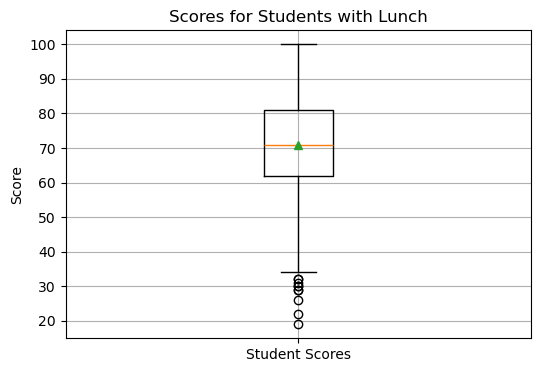

In [141]:
with_Lunch_Scores = np.hstack([with_Lunch['math_score'] ,with_Lunch['reading_score'] ,with_Lunch['writing_score']])

plt.figure(figsize=(6, 4))
plt.boxplot([with_Lunch_Scores], labels=['Student Scores'], showmeans=True)
plt.title('Scores for Students with Lunch')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [142]:
from scipy.stats import kstest, norm

# Perform the Kolmogorov-Smirnov test
with_Lunch_kstest_result = kstest(with_Lunch_Scores  , 'norm' , args=(with_Lunch_Scores.mean(), with_Lunch_Scores.std()))

# Get the test statistic and p-value
with_Lunch_test_statistic = with_Lunch_kstest_result.statistic
with_Lunch_p_value = with_Lunch_kstest_result.pvalue

# Print the result
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {with_Lunch_test_statistic}")
print(f"P-value: {with_Lunch_p_value}")

# Check if the scores follow a normal distribution
Alpha = 0.05
if with_Lunch_p_value < Alpha:
    print("The scores Do Not Follow A Normal Distribution")
else:
    print("The scores Follow A Normal Distribution")

Kolmogorov-Smirnov Test:
Test Statistic: 0.0280569602427031
P-value: 0.09326765411232774
The scores Follow A Normal Distribution


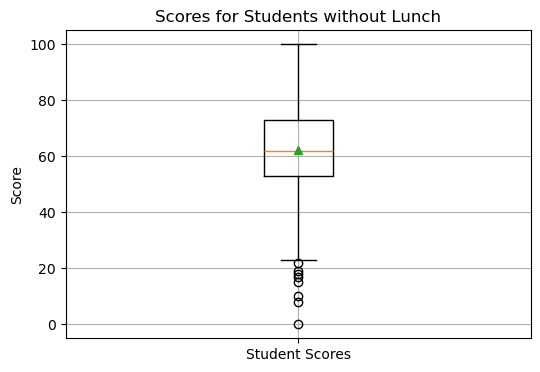

In [143]:
without_Lunch_Scores = np.hstack([without_Lunch['math_score'] ,without_Lunch['reading_score'] ,without_Lunch['writing_score']])

plt.figure(figsize=(6, 4))
plt.boxplot([without_Lunch_Scores], labels=['Student Scores'], showmeans=True)
plt.title('Scores for Students without Lunch')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [144]:
# Perform the Kolmogorov-Smirnov test
without_Lunch_kstest_result = kstest(without_Lunch_Scores , 'norm' , args=(without_Lunch_Scores.mean(), without_Lunch_Scores.std()))

# Get the test statistic and p-value
without_Lunch_test_statistic = without_Lunch_kstest_result.statistic
without_Lunch_p_value = without_Lunch_kstest_result.pvalue

# Print the result
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {without_Lunch_test_statistic}")
print(f"P-value: {without_Lunch_p_value}")

# Check if the scores follow a normal distribution
Alpha = 0.05
if without_Lunch_p_value < Alpha:
    print("The scores Do Not Follow A Normal Distribution")
else:
    print("The scores Follow A Normal Distribution")

Kolmogorov-Smirnov Test:
Test Statistic: 0.03362584964891635
P-value: 0.1757943009770907
The scores Follow A Normal Distribution


<span style="font-size: 28pt; font-weight: bold; color:plum">İki Anakütle Oranının Z testi</span>

<span style="font-size: 20pt; ">.   ilk olarak her anakütleden örneklem alıp onun oranı hesaplarız</span>

In [145]:
n1 = with_Lunch.sample(n=300, random_state=1)
display(Markdown(f"<span style='font-size:15px;'> Number of samples for Students with lunch: {len(n1)} \n</span>"))

n2 = without_Lunch.sample(n=300, random_state=1)
display(Markdown(f"<span style='font-size:15px;'> Number of samples for Students without lunch: {len(n2)} \n</span>"))

<span style='font-size:15px;'> Number of samples for Students with lunch: 300 
</span>

<span style='font-size:15px;'> Number of samples for Students without lunch: 300 
</span>

In [146]:
Scores = np.hstack([dataset['math_score'], dataset['reading_score'], dataset['writing_score']])
median_score = np.median(Scores)
print("Median score:", median_score)

Median score: 68.0


In [147]:
full_marks_with_Lunch = n1[
    (n1['math_score'] >= median_score) |
    (n1['reading_score'] >= median_score) |
    (n1['writing_score'] >= median_score)
]

# Count the number of students
x1 = len(full_marks_with_Lunch)
display(Markdown(f"Number of students who eat lunch before test and got a good grade in at least one of the three subjects <span style='font-size:16px;'>(x1) :{x1}</span>"))

Number of students who eat lunch before test and got a good grade in at least one of the three subjects <span style='font-size:16px;'>(x1) :217</span>

In [148]:
full_marks_without_Lunch = n2[
    (n2['math_score'] >= median_score) |
    (n2['reading_score'] >= median_score) |
    (n2['writing_score'] >= median_score)
]

# Count the number of students
x2 = len(full_marks_without_Lunch)
display(Markdown(f"Number of students who didn't eat lunch before test and sgot a good grade in at least one of the three subjects <span style='font-size:16px;'>(x2) :{x2}</span>"))

Number of students who didn't eat lunch before test and sgot a good grade in at least one of the three subjects <span style='font-size:16px;'>(x2) :143</span>

<span style="font-size: 20pt; ">Sonra hipotezler kurup Z test uygulanırız</span>

In [149]:
# H0: The percentage of students who ate a lunch and got a good grade is EQAL to the percentage of those who did not eat it
# H0 : P1 = P2
# H1: The percentage of students who ate a lunch and got a good grade is GREATER than the percentage of those who did not eat it
# H1 : P1 > P2
# 0.05 Anlam düzeyle

from statsmodels.stats.proportion import proportions_ztest

count  = np.array([x1, x2])
nobs = np.array([300, 300])
ztest_Score, p_value = proportions_ztest(count, nobs, alternative = "larger")
print(f"z-test Score: {ztest_Score}, p-value: {p_value}")

anlamlik_deger = 0.05
if ( p_value < anlamlik_deger) :
    display(Markdown(f"<span style='font-size:15px;'>.  Boş Hipotez Reddet ; P1 > P2</span>"))
else :
    display(Markdown(f"<span style='font-size:15px;'>.  Boş Hipotez Ret Edilmez; P1 = P2</span>"))

z-test Score: 6.166666666666667, p-value: 3.4872282099280545e-10


<span style='font-size:15px;'>.  Boş Hipotez Reddet ; P1 > P2</span>

<span style="font-size: 22pt; font-weight: bold;">Sınav hazırlığı faktörü</span>

In [150]:
Prepared = dataset[dataset['test_preparation_course'] == 'completed']
Nonprepared = dataset[dataset['test_preparation_course'] == 'none']

display(Markdown(f"<span style='font-size:15px;'>Students who prepared for test: \n</span>"))
display(Prepared[ ['test_preparation_course' , 'math_score' , 'reading_score' , 'writing_score'] ])
display(Markdown(f"<span style='font-size:15px;'>\n Students who didn't prepare for test: \n</span>"))
display(Nonprepared[ ['test_preparation_course' , 'math_score' , 'reading_score' , 'writing_score'] ])

<span style='font-size:15px;'>Students who prepared for test: 
</span>

,test_preparation_course,math_score,reading_score,writing_score
1,completed,69.0,90.0,88.000000
6,completed,88.0,95.0,92.000000
8,completed,64.0,64.0,67.000000
13,completed,78.0,72.0,70.000000
18,completed,46.0,42.0,46.000000
...,...,...,...,...
990,completed,86.0,81.0,75.000000
991,completed,65.0,82.0,78.000000
995,completed,88.0,99.0,68.012024
997,completed,59.0,71.0,65.000000


<span style='font-size:15px;'>
 Students who didn't prepare for test: 
</span>

,test_preparation_course,math_score,reading_score,writing_score
0,none,72.000000,72.0,74.0
2,none,66.065065,95.0,93.0
3,none,47.000000,57.0,44.0
4,none,76.000000,78.0,75.0
5,none,71.000000,83.0,78.0
...,...,...,...,...
992,none,55.000000,76.0,76.0
993,none,62.000000,72.0,74.0
994,none,63.000000,63.0,62.0
996,none,62.000000,55.0,55.0


<span style="font-size: 23pt; font-weight: bold; color:plum">Q-Q Plot ve Shapiro-Wilk Test </span>

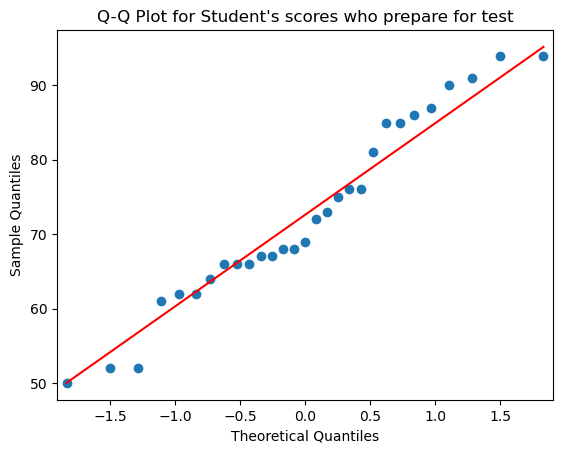

In [151]:
import statsmodels.api as sm

Prepared_Scores = np.hstack([Prepared['math_score'].sample(n=10, random_state=1) ,Prepared['reading_score'].sample(n=10, random_state=1) ,Prepared['writing_score'].sample(n=9, random_state=1)])

sm.qqplot(Prepared_Scores, line='s')
plt.title("Q-Q Plot for Student's scores who prepare for test")
plt.show()

In [152]:
from scipy.stats import shapiro

statistic, p_value1 = shapiro(Prepared_Scores)
print(f"Shapiro-Wilk test -> statistic: {statistic}, p-value: {p_value1}")

if (p_value1 < 0.05) :
    print ("The scores of the students who prepared for test Doesn't Show A Normal Distribution")
else : 
    print ("The scores of the students who prepared for test Show A Normal Distribution")

Shapiro-Wilk test -> statistic: 0.9530699253082275, p-value: 0.2197362333536148
The scores of the students who prepared for test Show A Normal Distribution


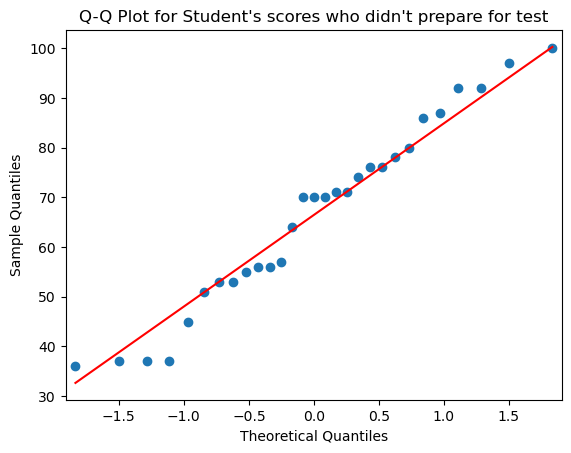

In [153]:
Nonprepared_Scores = np.hstack([Nonprepared['math_score'].sample(n=10, random_state=3) ,Nonprepared['reading_score'].sample(n=10, random_state=3) ,Nonprepared['writing_score'].sample(n=9, random_state=3)])

sm.qqplot(Nonprepared_Scores, line='s')
plt.title("Q-Q Plot for Student's scores who didn't prepare for test")
plt.show()

In [154]:
statistic, p_value1 = shapiro(Nonprepared_Scores)
print(f"Shapiro-Wilk test -> statistic: {statistic}, p-value: {p_value1}")

if (p_value1 < 0.05) :
    print ("The scores of the students who prepared for test Doesn't Show A Normal Distribution")
else : 
    print ("The scores of the students who prepared for test Show A Normal Distribution")

Shapiro-Wilk test -> statistic: 0.9580618143081665, p-value: 0.29424169659614563
The scores of the students who prepared for test Show A Normal Distribution


<span style="font-size: 23pt; font-weight: bold; color:plum">Tek Örneklem T-Test</span>

In [157]:
# H0: The mean of students who prepared for test is EQAL to the average grades
# H0 : μ = μ0
# H1: The mean of students who prepared for test is GREATER than the average grades
# H1 : μ > μ0

# Calculate the AVARAGE GRADES
Scores = np.hstack([dataset['math_score'], dataset['reading_score'], dataset['writing_score']])
μ = np.mean(Scores)
print("Mean score (μ0) =", μ)

Mean score (μ0) = 67.75342409878148


In [156]:
t_statistic, p_value = stats.ttest_1samp( Prepared_Scores , μ)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

anlamlik_deger = 0.05
if ( p_value < anlamlik_deger) :
    display(Markdown(f"<span style='font-size:15px;'>.  Boş Hipotez Reddet ; μ > μ0</span>"))
else :
    display(Markdown(f"<span style='font-size:15px;'>.  Boş Hipotez Ret Edilmez ; μ = μ0</span>"))

t-statistic: 2.0777485378450904
p-value: 0.047018260380353005


<span style='font-size:15px;'>.  Boş Hipotez Reddet ; μ > μ0</span>